In [2]:
import os
import argparse
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : SMALL_SIZE}

ticks_x = [0, 25, 50, 75, 100]
ticks_y = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hline_x = [-10,110]
interval_to_show_x = [-2,102]


df = pd.read_csv('../test.csv', sep=',')
dpi = 1200

strategies = df.strategy.unique()
samples = df.samples.unique()
samples.sort()

print(f'Found following strategies : {strategies}, and following samples {samples}')

df

Found following strategies : ['random' 'n_first' 'yolov8n' 'yolov8x'], and following samples [  0  25  50  75 100]


,run_id,data-name,strategy,samples,precision,recall,mAP50,mAP50-95,fitness
0,2x4snsj6,s05c024,random,75,0.976713,0.685947,0.696894,0.513856,0.532160
1,13eop5zb,s05c016,random,50,0.978462,0.913204,0.964664,0.822087,0.836345
2,215s24oo,s05c020,random,75,0.976331,0.862339,0.950650,0.755042,0.774603
3,2sgk49hw,s05c022,random,75,0.988604,0.925573,0.951067,0.846736,0.857169
4,5tgk8oqu,s05c018,n_first,75,0.995737,0.988313,0.994720,0.821556,0.838873
5,2irfvl7e,s05c022,n_first,25,0.969991,0.872228,0.936811,0.774976,0.791159
6,3766b0kg,s05c022,n_first,50,0.962838,0.929453,0.952618,0.816279,0.829913
7,1ol6m5ga,s05c024,random,25,0.979224,0.681549,0.691072,0.468077,0.490376
8,1ku2vxfv,s05c020,random,25,0.958243,0.757515,0.906605,0.690015,0.711674
9,5qhgr96i,s05c020,random,100,0.963958,0.935337,0.958024,0.762214,0.781795


In [14]:
df_strategy = df[['strategy', 'samples', 'precision']].loc[~df['strategy'].isin(['yolov8n', 'yolov8s','yolov8m', 'yolov8l', 'yolov8x'])]
df_coco = df[['strategy', 'samples', 'precision']].loc[df['strategy'].isin(['yolov8n', 'yolov8s','yolov8m', 'yolov8l', 'yolov8x'])]

In [18]:
df_strategy_pivot = pd.pivot_table(df_strategy, values='precision', index='strategy', columns='samples',
                          aggfunc='mean', margins=False, margins_name='Mean')
df_strategy_pivot

samples,25,50,75,100
strategy,,,,
n_first,0.904181,0.962254,0.959183,0.973155
random,0.919805,0.986510,0.927250,0.947582


In [22]:
df_coco

,strategy,samples,precision
41,yolov8n,0,0.057635
42,yolov8n,0,0.020496
43,yolov8x,0,0.009926
44,yolov8x,0,0.006326


In [23]:
df_coco_pivot = pd.pivot_table(df_coco, values='precision', index='strategy', columns='samples',
                          aggfunc='mean', margins=False, margins_name='Mean')
df_coco_pivot

samples,0
strategy,
yolov8n,0.039065
yolov8x,0.008126


In [25]:
df_strategy_simple = df_strategy[['strategy', 'samples', 'precision']]
np.mean(df_strategy_simple.loc[(df_strategy_simple['strategy'] == 'n_first') & (df_strategy_simple['samples'] == 75)]['precision'])

0.9591829057140504

In [28]:
dfs_strategy = {}
metrics = ['precision', 'recall', 'mAP50', 'mAP50-95', 'fitness']
coco_models = ['yolov8n', 'yolov8s','yolov8m', 'yolov8l', 'yolov8x']
df_strategy = df[['strategy', 'samples', *metrics]].loc[~df['strategy'].isin(coco_models)]
for metric in metrics:
    dfs_strategy[metric] = pd.pivot_table(df_strategy, values=metric, index='strategy', columns='samples',
                                    aggfunc='mean', margins=False, margins_name='mean')
    print('   ', metric)
    print(dfs_strategy[metric], end = '\n'*3)

    precision
samples        25        50        75        100
strategy                                        
n_first   0.904181  0.962254  0.959183  0.973155
random    0.919805  0.986510  0.927250  0.947582


    recall
samples        25        50        75        100
strategy                                        
n_first   0.757848  0.812141  0.815989  0.888165
random    0.767737  0.888529  0.791967  0.799283


    mAP50
samples        25        50        75        100
strategy                                        
n_first   0.812469  0.864793  0.866563  0.924444
random    0.837198  0.923461  0.846511  0.847507


    mAP50-95
samples        25        50        75        100
strategy                                        
n_first   0.615371  0.657205  0.670913  0.754715
random    0.644905  0.765255  0.676407  0.709572


    fitness
samples        25        50        75        100
strategy                                        
n_first   0.635081  0.677964  0.690478  0.771688
r

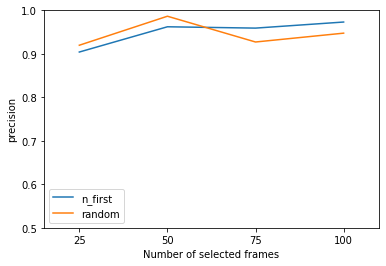

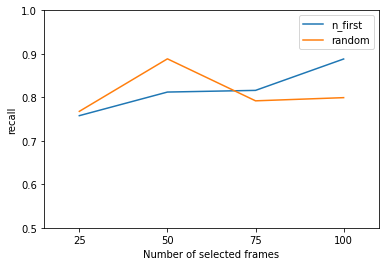

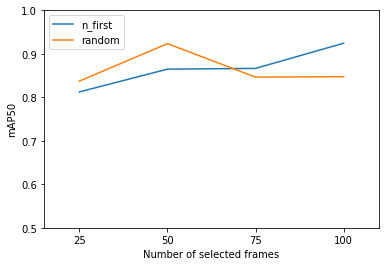

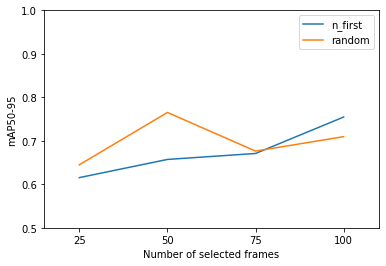

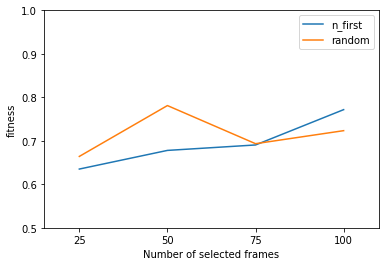

In [42]:
interval_to_show_x = [15, 110]
interval_to_show_y = [0.5, 1]

for metric, df_p in dfs_strategy.items():
    samples = list(df_p.columns)
    samples.sort()

    plt.plot(samples, df_p.values[0], label = df_p.index[0])
    plt.plot(samples, df_p.values[1], label = df_p.index[1])

    plt.xticks(ticks = ticks_x)
    plt.yticks(ticks = ticks_y)

    plt.xlim(interval_to_show_x)
    plt.ylim(interval_to_show_y)

    plt.xlabel('Number of selected frames')
    plt.ylabel(metric)

    plt.legend(list(df_p.index), loc = 'lower right')

    # plt.grid()

    plt.legend()
    plt.show()